In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import math
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM

Using TensorFlow backend.


In [2]:
#Getting the stock data
df = pdr.DataReader('AAPL' , data_source = 'yahoo' , start = '2015-01-01' , end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.933533
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.886818
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.273392
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.246353


In [3]:
#Number of rows and columns
df.shape

(1259, 6)

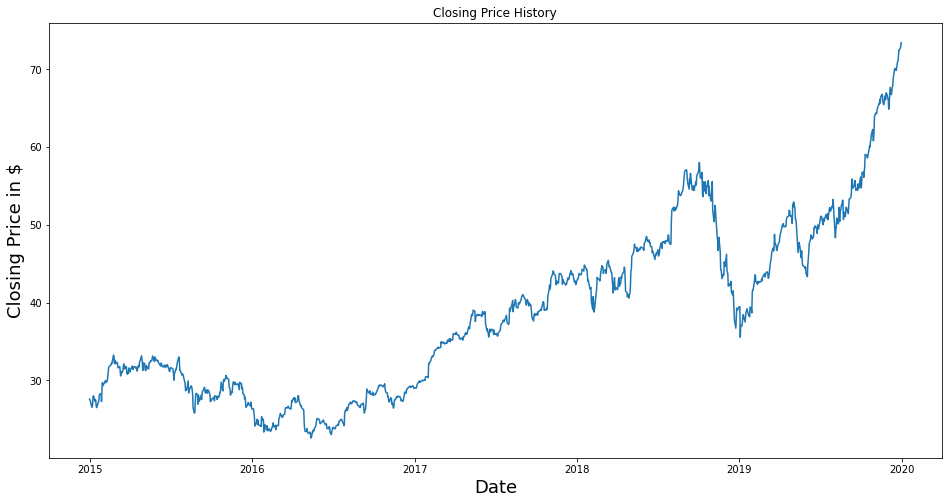

In [4]:
#Making a graph for the closing price
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Closing Price in $' , fontsize = 18)
plt.show()

In [5]:
#Creating a new dataframe which only has the 'Close' block
data = df.filter(['Close'])
#Now we convert the dataframe object to a numpy array
dataset = data.values
#Getting the number of rows to train the model
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1008

In [6]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09856869],
       [0.09340419],
       [0.0782549 ],
       ...,
       [0.98106337],
       [0.98952336],
       [1.        ]])

In [7]:
#Creating the Training Data Set
#Creating the Scaled Data Set
train_data = scaled_data[0:training_data_len, :] # : to get all columns

#Splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i,0]) #contains(appends) 60 values from 0 to 59 , 0th column
    y_train.append(train_data[i,0]) #contains the 61st value, ie 60
    if i<=60: # just showing the training sets as an example
        print(x_train)
        print(y_train)
        print()
        
#this process is repeated, next time 1-60 (including) values are taken and 61th is y train

[array([0.09856869, 0.09340419, 0.0782549 , 0.0783041 , 0.0856328 ,
       0.10599579, 0.10658603, 0.09301069, 0.09778174, 0.09571594,
       0.0810585 , 0.07697605, 0.09040384, 0.09448629, 0.10850428,
       0.11135708, 0.11194728, 0.09246964, 0.12281738, 0.14047516,
       0.13191681, 0.13914712, 0.13924551, 0.14372142, 0.14559051,
       0.14062272, 0.14450841, 0.15582116, 0.16988835, 0.17765975,
       0.18070929, 0.18439824, 0.18877579, 0.18744775, 0.19261229,
       0.20982738, 0.20574493, 0.18912005, 0.19713739, 0.18749698,
       0.19059564, 0.19192369, 0.1878904 , 0.17741384, 0.17834835,
       0.18100439, 0.1680685 , 0.15690326, 0.16777336, 0.16354336,
       0.17023265, 0.18051254, 0.18754614, 0.18277509, 0.17490534,
       0.1813487 , 0.17879104, 0.16251046, 0.16674046, 0.16187105])]
[0.17721709134499203]



In [8]:
#Converting the x_train and y_train into numpy arrays (used in LSTM model)
x_train,y_train = np.array(x_train) , np.array(y_train)

In [9]:
#Reshaping the data, because we need a 3D data
x_train = np.reshape(x_train,(948,60,1)) #samples, time-steps, features(closing price)
x_train.shape

(948, 60, 1)

In [10]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (60,1))) #50 = no of neurons , adding LSTM layer , 60=time step, 1 = feature
model.add(LSTM(50, return_sequences = False)) #false because we arent going to use anymore LSTM layers for our model
model.add(Dense(25)) # 25 neurones densely connected neural network
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error') #using optimizer to reduce loss function

In [12]:
#Training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 5) # batch size = total no of training samples present in a single batch
#epochs = number of iterations when a data set is passed forward and backward

Epoch 1/5
948/948 [==============================] - 27s 28ms/step - loss: 0.0014
Epoch 2/5
948/948 [==============================] - 25s 27ms/step - loss: 7.3714e-04
Epoch 3/5
948/948 [==============================] - 29s 30ms/step - loss: 6.4757e-04
Epoch 4/5
948/948 [==============================] - 29s 31ms/step - loss: 5.2049e-04
Epoch 5/5
948/948 [==============================] - 30s 31ms/step - loss: 4.4376e-04


In [13]:
#Creating a testing data set
#Creating a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :] #to the end of dataset & all the columns

#Creating the datasets x_test and y_text
x_test = []
y_test = dataset[training_data_len: , :] #the values that we want our model to predict

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) # contains past 60 values and y_test contains the 61st value
    
#So now the x_test set contains the past 60 values and the y_test set contains the 61^st values

In [14]:
#Converting the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshaping the data from 2D to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] , 1)) #No of samples(row), no of time steps(cols), no of features

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Unscaling the values

In [17]:
#Getting the RMS Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.23455278616977404

C:\Users\laksh\anaconda\envs\StockMarket\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


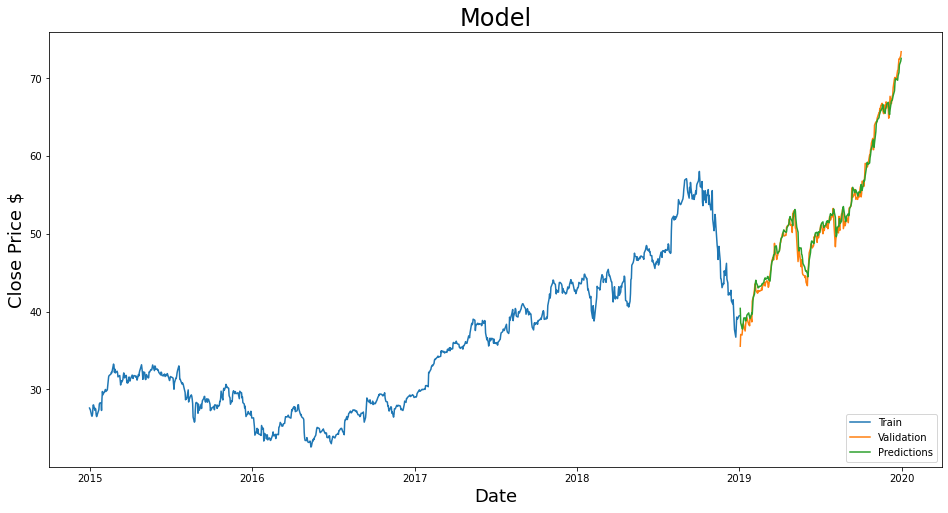

In [18]:
#Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Lets visualise the data now
plt.figure(figsize=(16,8))
plt.title('Model', fontsize=24)
plt.ylabel('Close Price $', fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Validation' , 'Predictions'] , loc='lower right')
plt.show()

In [19]:
#Showing the valid(actual) and predicted prices
valid

,Close,Predictions
Date,,
2019-01-03,35.547501,40.408306
2019-01-04,37.064999,38.554787
2019-01-07,36.982498,37.902409
2019-01-08,37.687500,37.748112
2019-01-09,38.327499,38.121647
...,...,...
2019-12-24,71.067497,70.327087
2019-12-26,72.477501,70.731354
2019-12-27,72.449997,71.713806


In [20]:
companies = {
    'Tickers': ['IOC.NS' , 'BALMLAWRIE.NS' , 'CHENNPETRO.NS' , 'OIL.NS' , 'ONGC.NS' , 'HYMTF' , 'M&MFIN.NS' , 'TTM' , 
                          'NSANY' , 'HMC' , 'IBN' , 'HDB' , 'PNB.NS' , 'CANBK.NS' , 'UNIONBANK.NS'],
    'Company Name': ['India Oil Corp.India' , 'Balmer Lawrie & Co. Ltd' , 'Chennai Petroleum Corporation Limited' , 
                 'Oil India Limited' , 'Oil and Natural Gas Corporation Limited' , 'Hyundai Motor Company' ,
                 'Mahindra & Mahindra' , 'Tata Motors Limited' , 'Nissan Motor Co.Ltd.' , 'Honda Motor Co. Ltd.' ,
                 'ICICI Bank Limited' , 'HDFC Bank Limited' , 'Punjab National Bank' , 'Canara Bank' , 'Union Bank of India'],
    'Type': ['OIL' , 'OIL' , 'OIL' , 'OIL' , 'OIL' , 'AUTOMOBILE' , 'AUTOMOBILE' ,  'AUTOMOBILE' ,  'AUTOMOBILE' , 
         'AUTOMOBILE' , 'BANK' , 'BANK' , 'BANK' , 'BANK' , 'BANK']}

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

company = pd.DataFrame(companies , index = Index)

In [21]:
bold_start = '\033[1m'
bold_end   = '\033[0m'

class stocks:
    
    def __init__(self):
        pass
    
    def showData(self):
        print(bold_start , "                      ------WELCOME TO THE STOCK MARKET PREDICTOR------" , bold_end)
        print("")
        print("This app will provide you with the estimated price of the next day of any particular stock you desire!")
        print("")
        print("The companies supported by our model are :")
        dfStyler = company.style.set_properties(**{'text-align': 'left'})
        dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
        return company
        
obj1 = stocks()
obj1.showData()

                       ------WELCOME TO THE STOCK MARKET PREDICTOR------ 

This app will provide you with the estimated price of the next day of any particular stock you desire!

The companies supported by our model are :


,Tickers,Company Name,Type
1,IOC.NS,India Oil Corp.India,OIL
2,BALMLAWRIE.NS,Balmer Lawrie & Co. Ltd,OIL
3,CHENNPETRO.NS,Chennai Petroleum Corporation Limited,OIL
4,OIL.NS,Oil India Limited,OIL
5,ONGC.NS,Oil and Natural Gas Corporation Limited,OIL
6,HYMTF,Hyundai Motor Company,AUTOMOBILE
7,M&MFIN.NS,Mahindra & Mahindra,AUTOMOBILE
8,TTM,Tata Motors Limited,AUTOMOBILE
9,NSANY,Nissan Motor Co.Ltd.,AUTOMOBILE
10,HMC,Honda Motor Co. Ltd.,AUTOMOBILE


Enter company ticker whose past 30 days history you would like to see : TTM
Would you like to see the data in the form of a graph or a database? : DATABASE

             High   Low   Open  Close   Volume  Adj Close
Date                                                     
2020-10-09   9.60  9.45   9.55   9.58  1004600       9.58
2020-10-12   9.40  9.29   9.33   9.34   816100       9.34
2020-10-13   9.20  9.00   9.20   9.08  1094900       9.08
2020-10-14   9.07  8.92   8.95   8.92  1036100       8.92
2020-10-15   8.82  8.57   8.68   8.81  1779600       8.81
2020-10-16   8.89  8.77   8.84   8.80   814700       8.80
2020-10-19   8.87  8.61   8.81   8.61  1698400       8.61
2020-10-20   9.04  8.81   8.84   8.92  1090600       8.92
2020-10-21   8.99  8.81   8.94   8.84   764500       8.84
2020-10-22   9.14  9.03   9.08   9.12  1049600       9.12
2020-10-23   9.34  9.16   9.30   9.32  1158700       9.32
2020-10-26   9.08  8.89   9.03   9.06  2141900       9.06
2020-10-27   9.58  9.15   9.15 

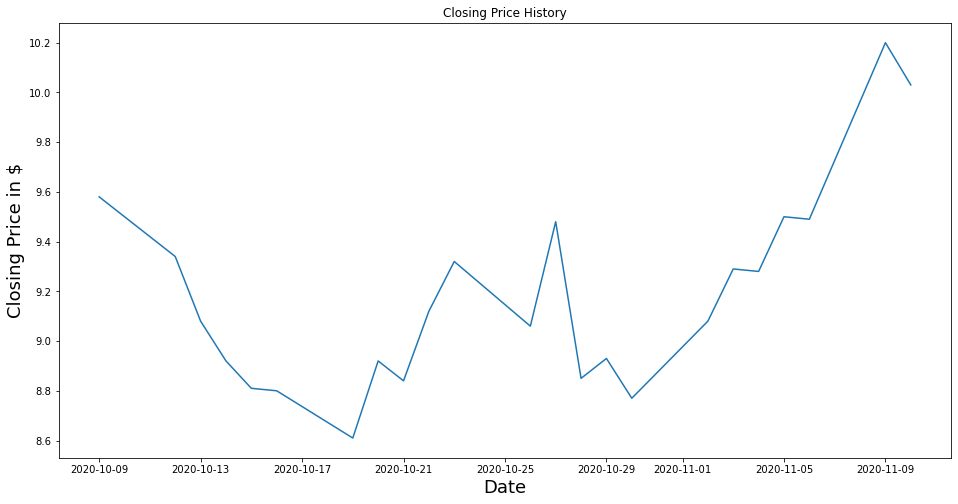


Would you like to view the data of any more companies? : NO


In [29]:
class history:
    
    def __init__(self):
        pass
    
    def compName(self):
        self.comp = input("Enter company ticker whose past 30 days history you would like to see : ").upper()
          
    def show(self):
        dataFrame = pdr.DataReader(self.comp , data_source = 'yahoo' , start = '2020-10-10' , end = '2020-11-10')
        print(dataFrame)
        
    def getCompanyName(self):
        return self.comp
        
class historyGraph(history):
    
    def __init__(self):
        pass
    
    def show(self,com):
        self.com = com
        dataFrame = pdr.DataReader(self.com , data_source = 'yahoo' , start = '2020-10-10' , end = '2020-11-10')
        plt.figure(figsize=(16,8))
        plt.title('Closing Price History')
        plt.plot(dataFrame['Close'])
        plt.xlabel('Date' , fontsize = 18)
        plt.ylabel('Closing Price in $' , fontsize = 18)
        plt.show()
        
obj = history()
obj2 = historyGraph()

while True:
    obj.compName()
    mode = input("Would you like to see the data in the form of a graph or a database? : ").upper()
    print("")
    if(mode == "GRAPH"):
        obj2.show(obj.getCompanyName())
    else:
        obj.show()
    print("")
    answer = input("Would you like to view the data of any more companies? : ").upper()
    if(answer != 'YES'):
        break

In [30]:
class prediction:
    
    def __init__(self):
        pass
        
    def companyName(self):
        self.comp = input("Enter the company ticker whose stock price you would like to predict : ").upper()
        
    def dateToday(self):
        self.date1 = input("Enter the date of the current day : ")

    def dateTomorrow(self):
        self.date = input("Enter the date of the next day : ")
        
    def calculate(self):
        #date = input("Enter the date of the next day : ")
        #Predicting prices for Januray 02 2020
        company_quote = pdr.DataReader(self.comp , data_source='yahoo' , start='2015-01-01' , end=self.date)

        #Creating a new dataframe
        new_df = company_quote.filter(['Close'])

        #Getting the last 60 day closing prices and converting the dataframe to an array
        last_60_days = new_df[-60:].values

        #Scaling the data
        last_60_days_scaled = scaler.transform(last_60_days)

        #Creating an empty list
        X_test = []

        #Appending the past 60 days to the X_test list
        X_test.append(last_60_days_scaled)

        #Converting the X_test dataset to a numpy array
        X_test = np.array(X_test)

        #Reshaping to 3D
        X_test = np.reshape(X_test, (X_test.shape[0] , X_test.shape[1] , 1))

        #Getting the predicted scaled prices
        pred_price = model.predict(X_test)
        
        #Undo the scaling
        pred_price = scaler.inverse_transform(pred_price)
        self.pred = pred_price
        
    def show(self):
        print(f"The estimated price for {self.comp} on  {self.date}  is  {self.pred}")
        
    def invest(self):
        company_quote = pdr.DataReader(self.comp , data_source='yahoo' , start=self.date1)
        new_df = company_quote.filter(['Close'])
        pred_price1 = new_df['Close'][1]
        
        if pred_price1<self.pred:
            print(f"The price of {self.comp} on {self.date1} is {pred_price1} and is lower than the predicted price -> should invest in the stock")
        else:
            print(f"The price of {self.comp} on {self.date1} is {pred_price1} and is higher than the predicted price -> dont invest in this stock.")
        
pred = prediction()
pred.companyName()
pred.dateToday()
pred.dateTomorrow()
pred.calculate()
pred.show()
pred.invest()

Enter the company ticker whose stock price you would like to predict : IBN
Enter the date of the current day : 25 11 2020
Enter the date of the next day : 26 11 2020
The estimated price for IBN on  26 11 2020  is  [[14.916046]]
The price of IBN on 25 11 2020 is 13.199999809265137 and is lower than the predicted price -> should invest in the stock
